# A3 Segmentation and Stereo Vision 
Student Name: Fulin Huang 
Student ID: 260740689

# 1 Segmentation

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

### 1.1 K-means clustering 

#### 1 Implement the K-means clustering algorithm using only the numpy library. You can use opencv and matplotlib libraries only to read and display images but not for clustering.

#### 2 Apply K-means to segment the image using [R,G,B] features. (R,G,B) represents color channels normalized between 0 and 1.

#### 3 Display the resulting segmented images for the first 10 iterations.

In [2]:
def k_means(image, k, numOfIteration):
    """
    image: input image 
    k: number of cluster centers 
    numOfIteration: number of iteation 
    Result: k-mean cluster
    
    """
    # Randomly initialize the K cluster center
    clusters = np.random.random_sample((k, 3)) * 255.0
    k_mean_image = image.copy()    
    
    images = []
    for i in range(numOfIteration):
        # Compute distance from points to each center 
        distances = np.array([k_mean_image - c for c in clusters])
        # assign a cluster center that is the closest
        clusters_index = np.argmin(np.linalg.norm(distances, axis=-1), axis = 0)
        
        images.append(clusters_index)
        
        # update cluster centers 
        new_clusters = np.zeros(shape=(k, 3))
        for c in range(k): 
            # calculate the cluster center based on the points in the cluster
            new_clusters[c] = np.mean(k_mean_image[clusters_index == c], axis = 0)
        clusters = new_clusters
    return images



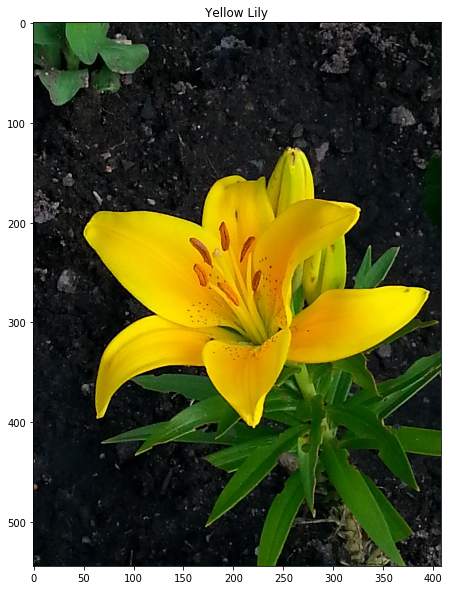

10


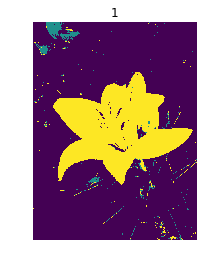

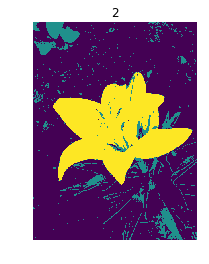

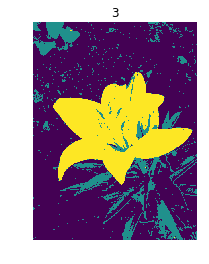

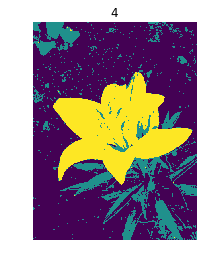

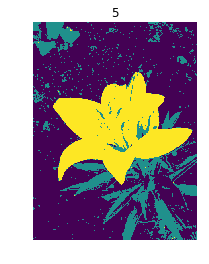

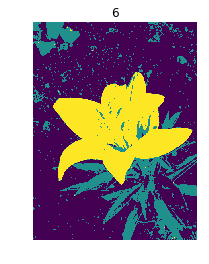

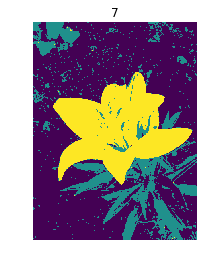

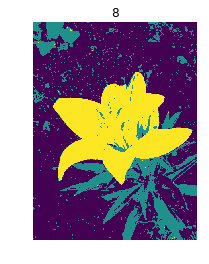

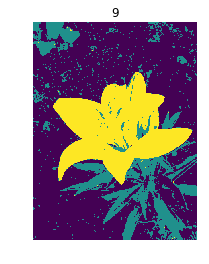

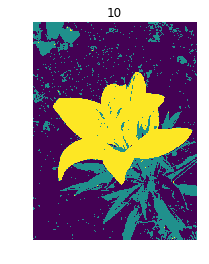

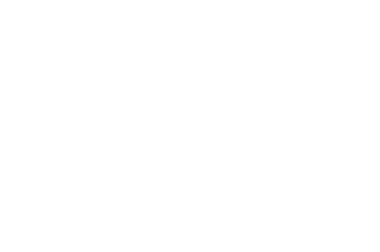

In [3]:
yellowlily = cv2.imread('yellowlily.png')

yellowlily = cv2.cvtColor(yellowlily, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(yellowlily),plt.title("Yellow Lily")
plt.show(), plt.axis('off')

images = k_means(yellowlily, 3, 10)

print(len(images))
for i in range(len(images)): 
    plt.title(i+1), plt.imshow(images[i])
    plt.show(), plt.axis('off')


### 1.2 Expectation Maximization - Gaussian Mixture Models
#### 1 Implement the EM algorithm using only the numpy library. You can use opencv and matplotlib libraries only to read and display images but not for the overall EM algorithm.
#### 2 Apply GMM to the provided image using the [R,G,B] features. (R,G,B) represents color channels normalized between 0 and 1.
#### 3 Display the resulting segmented images for the first 10 iterations.

In [4]:
# Determine the probability that a Gaussian component 
# is assigned to each sample (xi) based on current estimate 
# of the parameter 
# f(x, mean, std) = (1/mean*sqrt(2pi))*e^((-(x-mean)^2)/2*std^2)

def gaussian_prob(x, mean, std): 
    std_term = 1 / (std * math.sqrt(2 * math.pi))
    e_term = (-np.power((x - mean),2))/(2*np.power(std,2))
    e_pow = np.power(math.e, e_term)
    prob = std_term * e_pow
    # norm
    prob = np.linalg.norm(prob, axis = -1)
    return prob 
 

In [5]:
def Expectation_Maximization(image, c, numOfIteration): 
    
    # return 
    em_image = [] 
    
    # Initialize parameters 
    mean = np.random.random((c,3)) * 255.0
    std = np.full((c, 3), 255.0/c)
    prob = np.random.rand(c)
    prob = prob / np.sum(prob)
    
    for i in range(numOfIteration):
        print("{}th iteration".format(i+1))
        
        # E step 
        # Store probability 
        
        prob_point = np.empty(shape = (image.shape[0],image.shape[1],c))

        for h in range(image.shape[0]):
            for w in range(image.shape[1]):
#                 for center in range(c):
                x = image[h][w]
                prob_point[h][w] = gaussian_prob(x, mean, std)
#                 print(prob_point[h][w])
        
        # calculate sum 
        e_step_sum = np.sum(prob_point * prob, axis=-1)
        e_step_sum = e_step_sum.reshape((image.shape[0], image.shape[1], 1))
        # calculate probability
        print("e_step_sum", e_step_sum)
        prob_point = prob_point / e_step_sum 
        print("prob_point", prob_point)

        # clusters 
        clusters = np.argmax(prob_point, axis=-1)
        print(clusters)
        em_image.append(clusters)
      
        # M step 
        for cluster in range(c):
            for h in range(image.shape[0]):
                for w in range(image.shape[1]):
                    xi = image[h][w]
                    Xi_p = 0
                    Xi_p += xi * prob_point[h, w, cluster]
            # update probability, mean and standard deviation 
            # for each cluster 
            # number of pixels belong to a cluster 
            numPixels = image[clusters == cluster]
            # calculate probability 
            prob[cluster] = np.size(numPixels)/np.size(image)
            print("np.sum(prob_point[:,:,cluster])", np.sum(prob_point[:,:,cluster]))
            mean[cluster] = Xi_p / np.sum(prob_point[:,:,cluster])
            std[cluster] = np.std(numPixels, axis=0)
        
            
#             std[center] = np.sqrt(np.var(n, axis=0))
            print("prob", prob[cluster])
            print("mean", mean[cluster])
            print("std", std[cluster])
                    
    return em_image
        

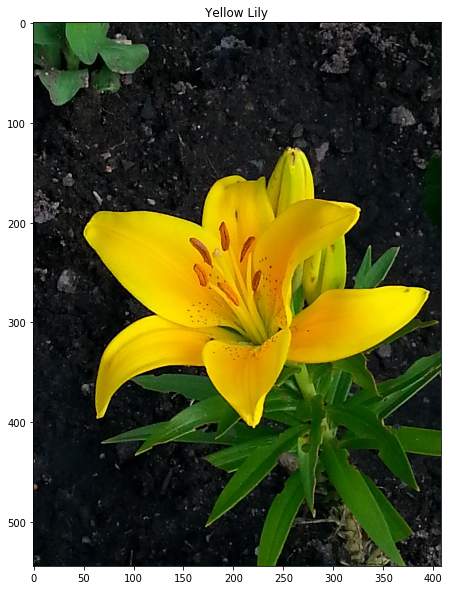

1th iteration
e_step_sum [[[0.00616953]
  [0.00613924]
  [0.00610731]
  ...
  [0.00478392]
  [0.00470129]
  [0.00444907]]

 [[0.00616953]
  [0.00615459]
  [0.00613924]
  ...
  [0.00490624]
  [0.00457592]
  [0.00440652]]

 [[0.00616953]
  [0.00616953]
  [0.00616953]
  ...
  [0.00482492]
  [0.00457592]
  [0.00436383]]

 ...

 [[0.00575331]
  [0.0051827 ]
  [0.00425395]
  ...
  [0.00636209]
  [0.00671497]
  [0.00653407]]

 [[0.00486569]
  [0.00436383]
  [0.00446846]
  ...
  [0.00586544]
  [0.00669435]
  [0.00655889]]

 [[0.00470129]
  [0.00444907]
  [0.00463771]
  ...
  [0.00501748]
  [0.00615283]
  [0.00628444]]]
prob_point [[[1.07736886 0.95427445 0.83750919]
  [1.08007676 0.94517001 0.8414653 ]
  [1.0827202  0.93600239 0.84568689]
  ...
  [1.09692647 0.79594345 0.98504698]
  [1.09715374 0.79357675 0.98743844]
  [1.09762951 0.78673788 0.99486632]]

 [[1.07736886 0.95427445 0.83750919]
  [1.07873069 0.94973051 0.83945406]
  [1.08007676 0.94517001 0.8414653 ]
  ...
  [1.09651803 0.7995825

np.sum(prob_point[:,:,cluster]) 232357.6241331413
prob 0.25728986447520186
mean [0.00028784 0.00026167 0.00026167]
std [80.11410878 49.96255942  3.78557639]
np.sum(prob_point[:,:,cluster]) 235425.92652623972
prob 0.4025329801038062
mean [0.00024818 0.00022562 0.00022562]
std [25.7875149  26.0489924   7.27920716]
np.sum(prob_point[:,:,cluster]) 187944.4091738581
prob 0.3401771554209919
mean [0.00042322 0.00038474 0.00038474]
std [41.42688691 42.80262322 19.18962627]
5th iteration
e_step_sum [[[0.00445681]
  [0.00477776]
  [0.0051181 ]
  ...
  [0.01639114]
  [0.0173872 ]
  [0.02399176]]

 [[0.00445681]
  [0.00461488]
  [0.00477776]
  ...
  [0.01515572]
  [0.01967259]
  [0.02647179]]

 [[0.00445681]
  [0.00445681]
  [0.00445681]
  ...
  [0.01596156]
  [0.01967259]
  [0.02984444]]

 ...

 [[0.00736623]
  [0.01245615]
  [0.03928301]
  ...
  [0.00289898]
  [0.00079458]
  [0.0019617 ]]

 [[0.01555319]
  [0.02984444]
  [0.02220136]
  ...
  [0.00623135]
  [0.00102935]
  [0.00182964]]

 [[0.0173

e_step_sum [[[0.00470737]
  [0.00499201]
  [0.00529572]
  ...
  [0.01603609]
  [0.0172969 ]
  [0.0221792 ]]

 [[0.00470737]
  [0.00484742]
  [0.00499201]
  ...
  [0.01453481]
  [0.01959644]
  [0.02304698]]

 [[0.00470737]
  [0.00470737]
  [0.00470737]
  ...
  [0.01548904]
  [0.01959644]
  [0.02399265]]

 ...

 [[0.00741326]
  [0.01195339]
  [0.02838799]
  ...
  [0.00347011]
  [0.00142235]
  [0.00258999]]

 [[0.01499102]
  [0.02399265]
  [0.0213175 ]
  ...
  [0.00652705]
  [0.00167285]
  [0.00246346]]

 [[0.0172969 ]
  [0.0221792 ]
  [0.01803602]
  ...
  [0.01477124]
  [0.0046304 ]
  [0.00388499]]]
prob_point [[[1.12657225 0.92127941 0.96488697]
  [1.13260924 0.89736502 1.00088664]
  [1.13493856 0.87823975 1.03327434]
  ...
  [1.05126196 0.92424645 1.06776621]
  [1.11347237 0.90063799 1.02232143]
  [1.37624791 0.78832857 0.85388756]]

 [[1.12657225 0.92127941 0.96488697]
  [1.13004392 0.90875035 0.98330307]
  [1.13260924 0.89736502 1.00088664]
  ...
  [1.00274412 0.9376258  1.11261392]


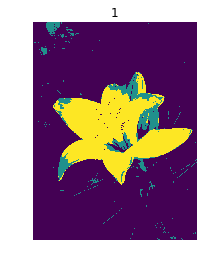

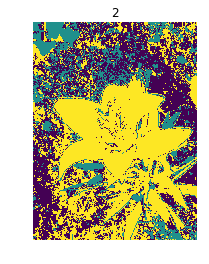

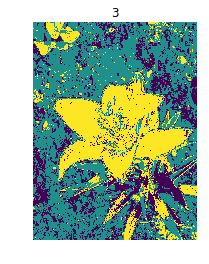

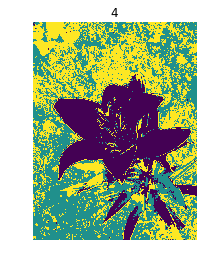

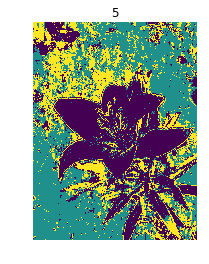

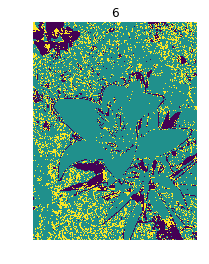

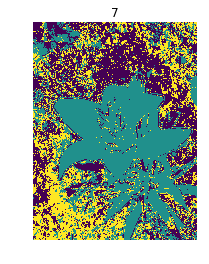

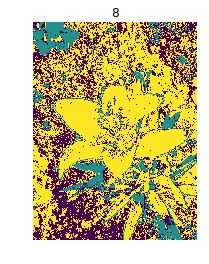

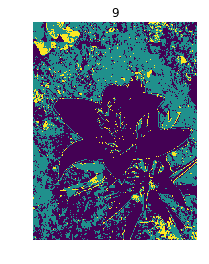

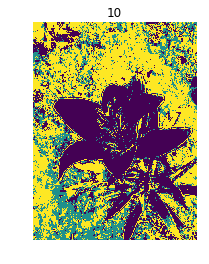

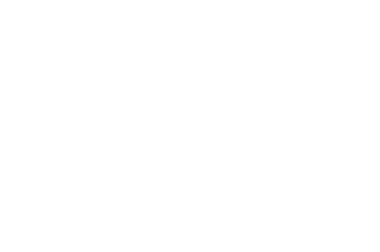

In [6]:
EM_image = yellowlily.copy() 

plt.figure(figsize=(10,10))
plt.imshow(yellowlily),plt.title("Yellow Lily")
plt.show(), plt.axis('off')

output = Expectation_Maximization(EM_image, 3,10)

for i in range(len(output)): 
    plt.title(i+1), plt.imshow(output[i])
    plt.show(), plt.axis('off')


### 1.3 Reasoning question

#### 1 Under what data distribution conditions would K-means and EM give the same solution, provided similar initializations?

A k-means cluster has circular shape while a EM Gaussian Mixture Model cluster can have ellipsoid shape. If the data is of ellipsoid shape, a k-means model will not be accurate because the clusters are always circular shaped. Hence, to let k-means and EM give the same solution, the data should define by circle shapes.
(https://www.python-course.eu/expectation_maximization_and_gaussian_mixture_models.php)


# 2 Stereo Vision - Epipolar Geometry

#### Use a stereo image-pair of your choice from the Middlebury dataset: http: //vision.middlebury.edu/stereo/data/scenes2014/ for the following ques- tions. You can use functions from OpenCV and matplotlib for this question

#### 1 Compute matching SIFT keypoints from a stereo image pair.

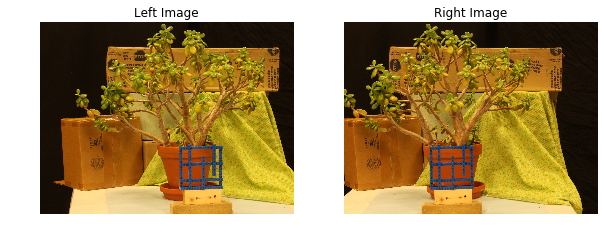

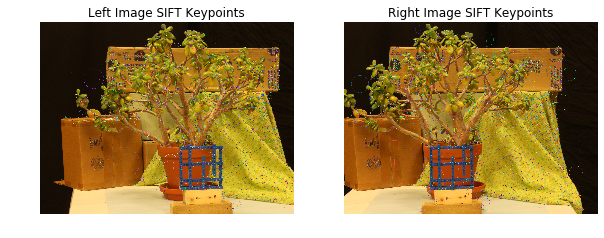

In [208]:
# Display left and right images 
image_left = cv2.imread('im2.png')
image_right = cv2.imread('im3.png')

image_left = cv2.cvtColor(image_left, cv2.COLOR_BGR2RGB)
image_right = cv2.cvtColor(image_right, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.subplot(121), plt.title("Left Image")
plt.axis('off'), plt.imshow(image_left)
plt.subplot(122), plt.title("Right Image")
plt.axis('off'), plt.imshow(image_right)
plt.show()

# Create SIFT object 
sift_obj = cv2.xfeatures2d.SIFT_create() 

# Make Image Copy 
image_left_sift = image_left.copy()
image_right_sift = image_right.copy() 

# compute SIFT keypoint and descriptor 
keypoint_left, des_left = sift_obj.detectAndCompute(image_left, None) 
keypoint_right, des_right = sift_obj.detectAndCompute(image_right, None)

# Draw keypoints 
cv2.drawKeypoints(image_left, keypoint_left, image_left_sift, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(image_right, keypoint_right, image_right_sift, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.figure(figsize=(10,10))
plt.subplot(121), plt.title("Left Image SIFT Keypoints")
plt.axis('off'), plt.imshow(image_left_sift)
plt.subplot(122), plt.title("Right Image SIFT Keypoints")
plt.axis('off'), plt.imshow(image_right_sift)
plt.show()


#### 2 Compute and display the epipolar lines for both images. 

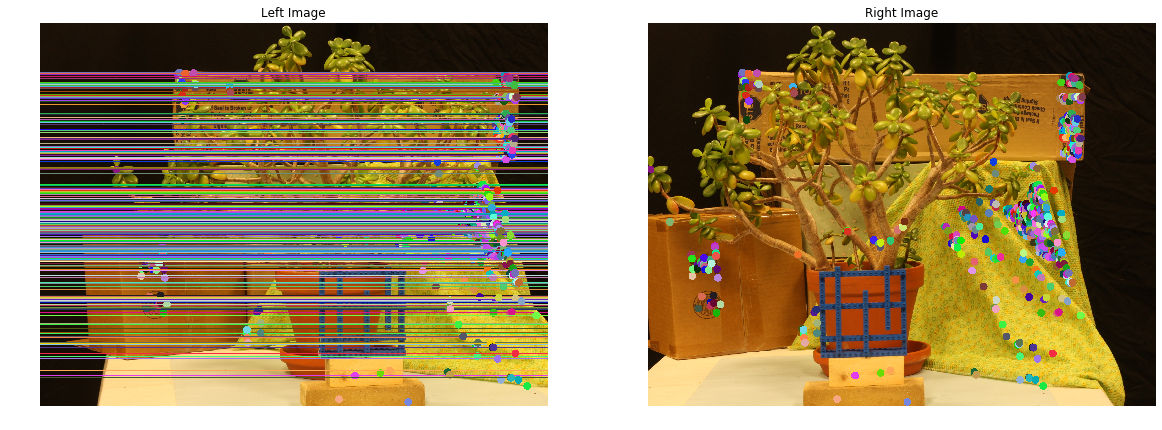

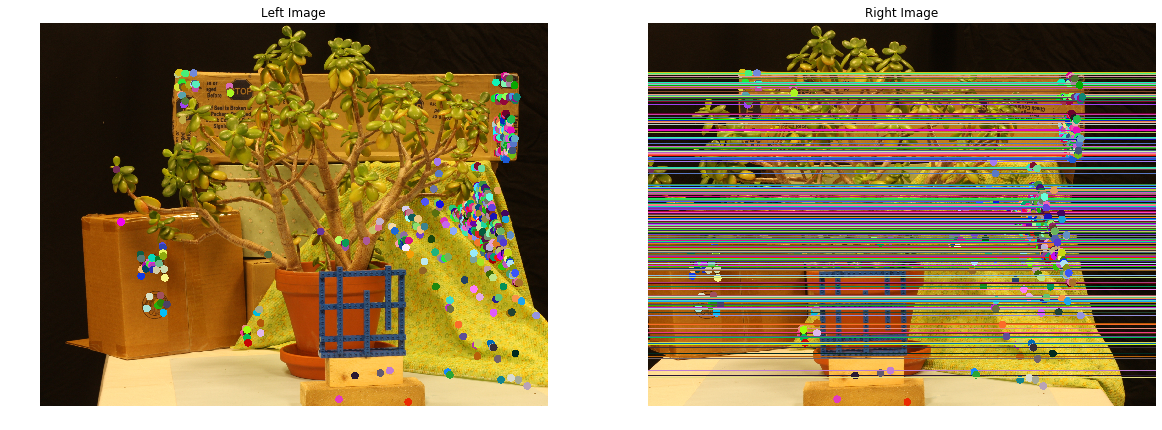

In [209]:
# Create Brute-Force Matcher 
bf_Matcher = cv2.BFMatcher(cv2.NORM_L2)

# Match descriptors 
matches = bf_Matcher.knnMatch(des_left, des_right, k=2)

# Store good matches 
goodMatches = [] 
ptsL = []
ptsR = [] 
for i, (m, n) in enumerate(matches):
    if m.distance < 0.3 * n.distance: 
        goodMatches.append(m)
        ptsR.append(keypoint_right[m.trainIdx].pt)
        ptsL.append(keypoint_left[m.queryIdx].pt)
        
ptsL = np.int32(ptsL)
ptsR = np.int32(ptsR)

# Find fundamental matrix 
# The calculated fundamental matrix can be passed further
# to computeCorrespondEpilines() that finds epipolar lines 
# ref: https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html
F, mask = cv2.findFundamentalMat(ptsL, ptsR, cv2.FM_LMEDS)

# Get inliers 
ptsL = ptsL[mask.ravel()==1]
ptsR = ptsR[mask.ravel()==1]


# Draw Line Function 
def drawlines(img1, img2, lines, pts1, pts2): 
    row,col,_ = img1.shape
    img1 = img1.copy()
    img2 = img2.copy()
    for param, pt1, pt2 in zip(lines, pts1, pts2):
        
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -param[2]/param[1]]) # y = -c/b
        x1, y1 = map(int, [col, -(param[2]+param[0]*col)/param[1]]) # y = (-a * col - c) / b
        # draw lines and points 

        img1 = cv2.line(img1, (x0, y0), (x1, y1), color, 2)
        img1 = cv2.circle(img1, tuple(pt1), 20, color, -1)
        img2 = cv2.circle(img2, tuple(pt2), 20, color, -1)
    return img1, img2

# Find epilines & Draw Lines
# cv2.ComputeCorrespondEpilines(points, whichImage, F)
# points: input points; which Image: Index of the image(1 or 2) that contains the points
# lines_left: output vector of the epipolar lines corresponding to the points in the other image. 
# Each liine ax + by + c = 0 is encoded by 3 numbers (a,b,c)
# Ref: https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html
lines_left = cv2.computeCorrespondEpilines(ptsR, 2, F)
lines_left = lines_left.reshape(-1, 3)
image_left_line_1, image_right_line_1 = drawlines(image_left, image_right, lines_left, ptsL, ptsR)

plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(image_left_line_1)
plt.title("Left Image"), plt.axis('off')
plt.subplot(122), plt.imshow(image_right_line_1)
plt.title("Right Image"), plt.axis('off')
plt.show()

lines_right = cv2.computeCorrespondEpilines(ptsL, 1, F)
lines_right = lines_right.reshape(-1, 3)
image_right_line_2, image_left_line_2 = drawlines(image_right, image_left, lines_right, ptsR, ptsL)


plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(image_left_line_2)
plt.title("Left Image"), plt.axis('off')
plt.subplot(122), plt.imshow(image_right_line_2)
plt.title("Right Image"), plt.axis('off')
plt.show()

#### 3 Pick any one keypoint in the left image which has a correct match in the right image, and is on the corresponding epipolar line. Extract a patch of size (5 × 5) around this keypoint in the left image. 

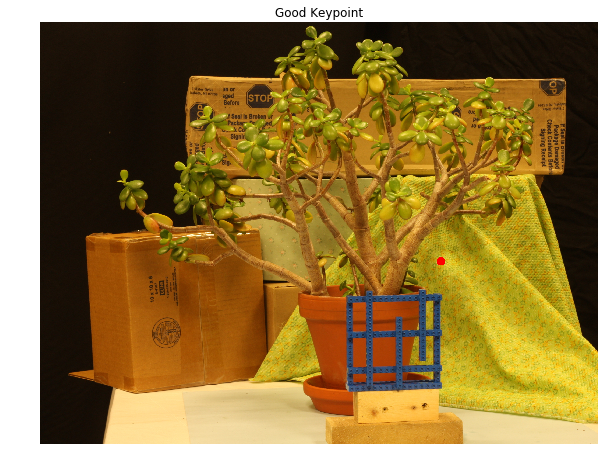

[1891 1127]
(1988, 2632, 3)


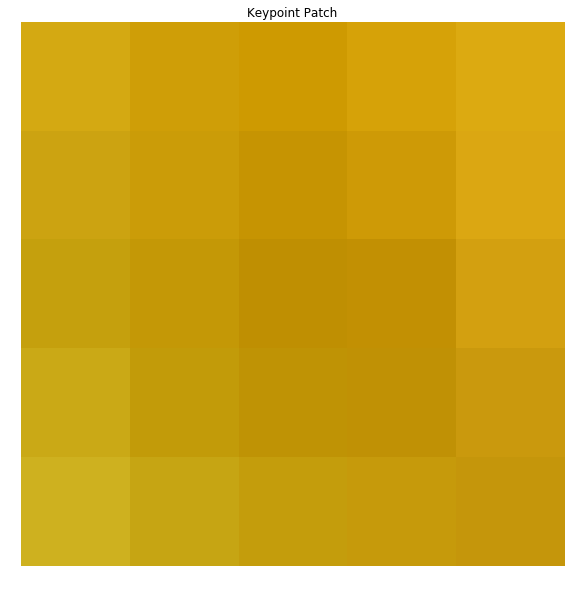

In [210]:
# Pick one good keypoint in the left image 
image_draw_circle = image_left.copy()
keypoint = [] 
randomIndex = 100
keypoint = ptsL[randomIndex]
# Draw Circle
color = (255, 0, 0)
image_left_keypoint = cv2.circle(image_draw_circle, tuple(keypoint), 20, color, -1)

# Display keypoint 
plt.figure(figsize=(10,10))
plt.title("Good Keypoint"),plt.axis('off')
plt.imshow(image_left_keypoint)
plt.show()

print(keypoint)
print(image_left_keypoint.shape)

# Extract Patch Method 
def Extract_Patch(size, keypoint, image):
    x = keypoint[0]
    y = keypoint[1]
    x_range_left = x - size[0]//2
    x_range_right = x + (size[0] - size[0]//2)
    y_range_left = y - size[1]//2
    y_range_right = y + (size[1] - size[1]//2)
#     print(x_range_left, x_range_right)
#     print(y_range_left, y_range_right)
    return image[y_range_left:y_range_right , x_range_left:x_range_right]

# Extract a patch of size (5x5)
size = (5, 5)
keypoint_patch = Extract_Patch(size, keypoint, image_left)

# Display Extracted Patch 
plt.figure(figsize=(10, 10))
plt.imshow(keypoint_patch), plt.axis('off')
plt.title("Keypoint Patch")
plt.show() 


#### 4 Match the extracted patch to every 5 × 5 patch along the corresponding epipolar line in the right image. Use normalized cross correlation metric for matching.

[1891 1127]


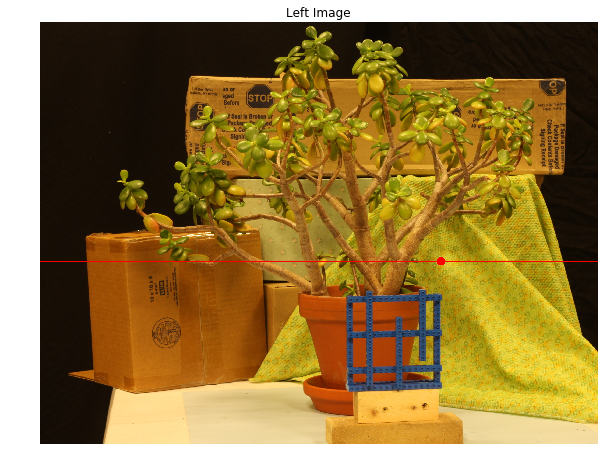

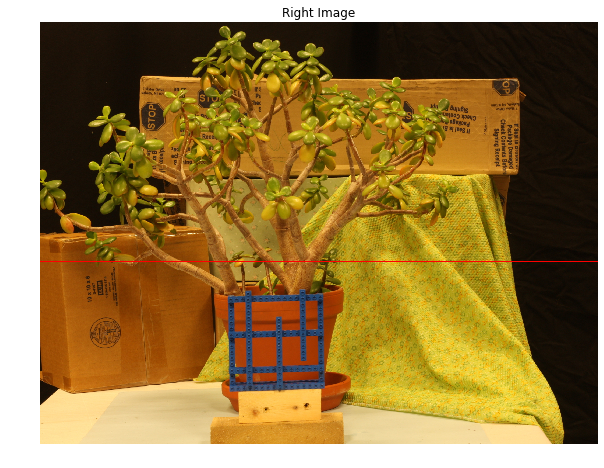

In [242]:
# Find fundamental Matrix
F, mask = cv2.findFundamentalMat(ptsL, ptsR, cv2.FM_LMEDS)

# Find epilines & Draw Line
keypoint_list = []
keypoint_list.append(keypoint)
keypoint_list = np.int32(keypoint_list)
print(keypoint)

# Find corresponding epipolar line 
line_right = cv2.computeCorrespondEpilines(keypoint_list, 1, F)
line_right = line_right.reshape(-1, 3)

# Draw line 
color = (255, 0, 0)
row, col,__ = image_left.shape
x0, y0 = map(int, [0, -line_right[0][2]/line_right[0][1]]) # y = -c/b
x1, y1 = map(int, [col, -(line_right[0][2]+line_right[0][0]*col)/line_right[0][1]]) # y = (-a * col - c) / b
# print(x0,y0)
# print(x1,y1)
# print(image_left.shape)

# draw line and point
image_left_line_3 = image_left_keypoint.copy() 
image_right_line_3 = image_right.copy() 
image_left_line_3 = cv2.line(image_left_line_3, (x0, y0), (x1, y1), color, 4)
image_right_line_3 = cv2.line(image_right_line_3, (x0, y0), (x1, y1), color, 4)

# image_left_line_3, image_right_line_3 = drawlines(image_left_keypoint, image_right, line_right, keypoint_list, ptsR[randomIndex:randomIndex+1])
# image_left_line_1, image_right_line_1 = drawlines(image_left, image_right, lines_left, ptsL, ptsR)
# image_right_line_3, image_left_line_3 = drawlines(image_right, image_left_keypoint, line_right, ptsR[100:101], keypoint_list)

plt.figure(figsize=(10,10)),plt.axis('off')
plt.title("Left Image"), plt.imshow(image_left_line_3)
plt.figure(figsize=(10,10)),plt.axis('off')
plt.title("Right Image"), plt.imshow(image_right_line_3)
plt.show()

def Patch_List(image, line, size):
    height, width,__ = image.shape
    patch_list = []
    for i in range(size[1]//2, width - size[1]//2, size[1]): 

        y = int(-(line[0][0]*i+line[0][2])/line[0][1])
        keypoint = (i, y)
        patch_list.append(Extract_Patch(size, keypoint, image))
    return patch_list 

size = (5, 5)
image_right_patch = image_right.copy() 
patch_list = Patch_List(image_right_patch, line_right, size)

# for i in range(len(patch_list)): 
#     plt.figure(figsize=(5,5))
#     plt.imshow(patch_list[i]),plt.axis('off')
#     plt.title(i+1), plt.show() 

def Normalized_Cross_Correlation(reference, patch_list, line): 
    ncc_list = []
    reference = reference.reshape(1, -1)
    for i in range(len(patch_list)): 
        right_patch = patch_list[i] 
        right_patch = right_patch.reshape(1, -1)
        right_patch = np.transpose(right_patch)
        
        nominator = np.sum(np.dot(reference,right_patch))
        denominator = np.sqrt(np.dot(np.sum(np.power(reference,2)), np.sum(np.power(right_patch,2))))
        ncc = nominator/denominator 
        ncc_list.append(ncc)
    
    print("NCC list: ", ncc_list)
    # Find Index of Best Matching Point with Max NCC value 

    max_ncc = max(ncc_list[200:])
    best_patch_index = ncc_list.index(max_ncc)
    print("Best Patch Index is: ", best_patch_index)
    
    # Plot normalized cross correlation values (on y-axis) 
    # against index of the patch in the left image (on x-axis)
    x_axis_array = []
    x0 = keypoint[0] # reference x coordinate value 
    print("x0", x0)
    for i in range(len(patch_list)):
        x1 = i * size[0] # int(-(line[0][0]*i+line[0][2])/line[0][1])
        diff = x1 - x0
        x_axis_array.append(diff)
    print("Different in X_axis is :", x_axis_array)
    
    # Plot Diagram     
    x_axis = (x_axis_array)
    plt.xlabel("Patch Index")
    plt.ylabel("Normalized Cross Correlation")
    plt.plot(x_axis, ncc_list)
    plt.grid(True)
    plt.show() 
    
    #  Display found matching points in both the images
    x_coor = best_patch_index * size[0]
    y_coor  = int(-(line[0][0]*i+line[0][2])/line[0][1])
    right_circle = (x_coor, y_coor)
    colo = (255, 0, 0)
    image_right_circle = image_right.copy()
    image_right_circle = cv2.circle(image_right_circle, tuple(right_circle), 20, color, -1)
    
    plt.figure(figsize=(10,10))
    plt.imshow(image_left_keypoint), plt.axis('off')
    plt.title("Circle On Left Image")
    plt.show()
    
    plt.figure(figsize=(10,10))
    plt.imshow(image_right_circle), plt.axis('off')
    plt.title("Circle On Right Image")
    plt.show()
    
    plt.figure(figsize=(10,10))
    plt.imshow(keypoint_patch), plt.axis('off')
    plt.title("Patch On Left Image")
    plt.show()
    
    plt.figure(figsize=(10,10))
    plt.imshow(patch_list[best_patch_index])
    plt.title("Best matching Point on Right Image")
    plt.axis('off'), plt.show() 


#### 5 Plot normalized cross correlation values (on y-axis) against index of the patch in the left image (on x-axis)(refer Lecture 13 slide 57). Find the matching point with maximum normalized cross correlation value. Display found matching points in both the images. 

NCC list:  [0.0006734393666038764, 0.015122829136588934, 0.02490511655539887, 0.032304630924720364, 0.032493713106359116, 0.028241088156636684, 0.021292970324990716, 0.0346746886206287, 0.032838600534148894, 0.028352746042130426, 0.0251788657498716, 0.013865299238007016, 0.02092398394777612, 0.014376437732397246, 0.024461315225445483, 0.015870981935729726, 0.0012464209177517121, 0.026908806676365856, 0.01673595068482199, 0.00982866905295182, 0.009987831285132535, 0.006923027136097016, 0.006388653790009688, 0.010593192647447104, 0.02488545219483993, 0.02003147012195173, 0.029021233726970828, 0.007684953482955191, 0.023653807587083506, 0.0016674239488646211, 0.002556935849316473, 0.017044720093441445, 0.010525569119952142, 0.024504495456002546, 0.01898363069502169, 0.015090904305793436, 0.010853330751754481, 0.04824345202693482, 0.03339275108696662, 0.02975835950822043, 0.02534627893869387, 0.017256022530420242, 0.031333093921558794, 0.03632751725237593, 0.034847435668539074, 0.012542502

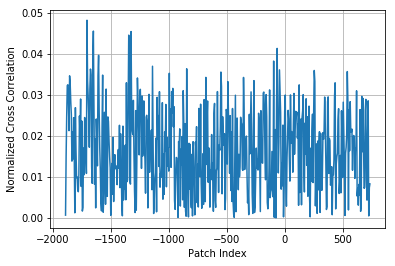

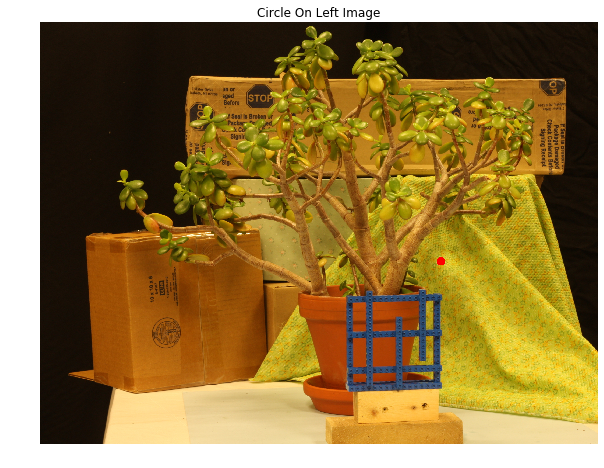

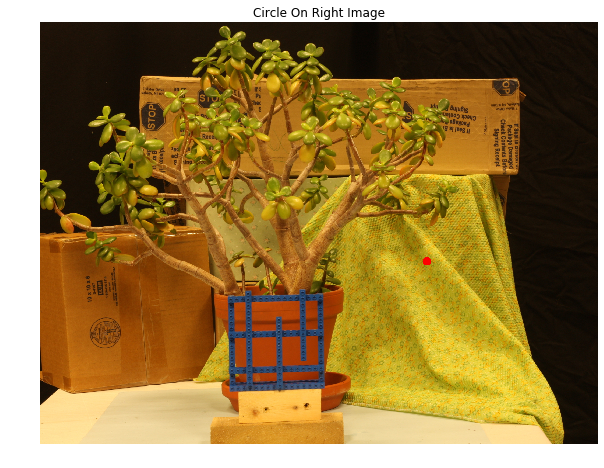

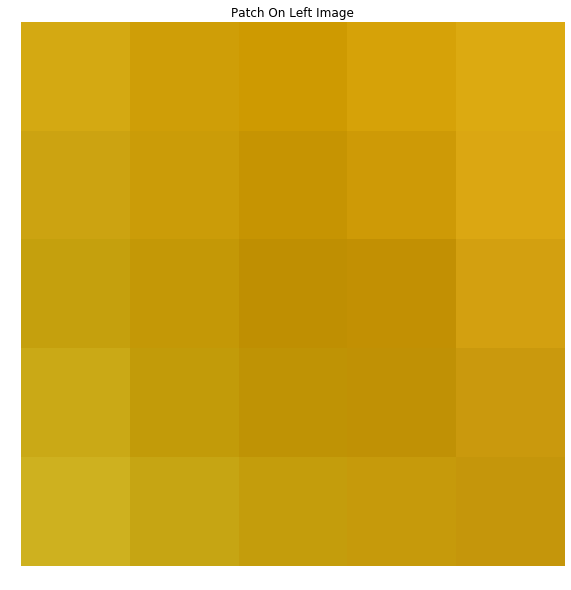

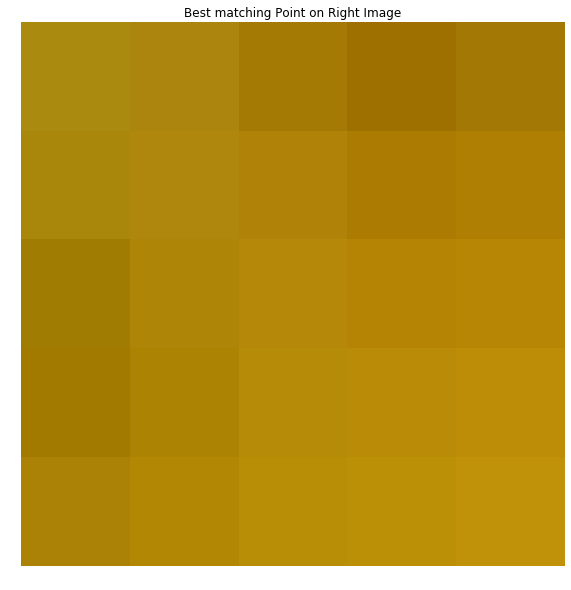

In [243]:
Normalized_Cross_Correlation(keypoint_patch, patch_list, line_right)

# TO CHECKS - Patch NOT the same 

#### 6 Did you find exactly one matching point or multiple matches? Is the matching point you found the correct one? Explain.

# 3 Motion Algorithm - Multi-resolution Lucas- Kanade optical flow estimation 

#### You will now explore the multi-resolution Lucas-Kanade optical flow estimation algorithm discussed in class. Use the given two video frames ‘frame1.png’ and ‘frame2.png’ shown in Figure 2 for this question. You can use functions from OpenCV and matplotlib for this question. Follow each of the steps below:

#### 1 Extract good points to track from ‘frame1.png’ using the Harris corner detector. Use the openCV function goodFeaturesToTrack and set the parameter value maxCorners=500. Search for the optimal values for the parameters qualityLevel, minDistance, blockSize. 

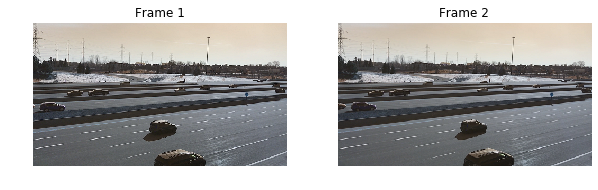

There are 9 good points


In [258]:
# Display frame 1 and frame 2 
image_frame1 = cv2.imread("frame1.png")
image_frame2 = cv2.imread("frame2.png")

image_frame1_gray = cv2.cvtColor(image_frame1, cv2.COLOR_BGR2GRAY)
image_frame2_gray = cv2.cvtColor(image_frame2, cv2.COLOR_BGR2GRAY)


plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(image_frame1)
plt.axis('off'), plt.title("Frame 1")
plt.subplot(122), plt.imshow(image_frame2)
plt.axis('off'), plt.title("Frame 2")
plt.show()

# ShiTomasi Corner Detection 
feature_params = dict(maxCorners = 500,
                     qualityLevel = 0.3, 
                     minDistance = 7, 
                     blockSize = 7,
                     useHarrisDetector = True, 
                     k = 0.05)

# Find good corners 
points = cv2.goodFeaturesToTrack(image_frame1_gray, **feature_params)

print("There are {} good points".format(len(points)))


#### 2 Compute the optical flow between ‘frame1.png’ and ‘frame2.png’ for the above detected points. Use the openCV function calcOpticalFlowPyrLK. Set winSize=10, TERM CRITERIA EPS=0.03 and TERM CRITERIA COUNT=10.
#### Experiment with the maximum pyramid level by variying maxLevel parameter from 0 to 10. For each pyramid level, compute the mean of the tracking error returned by calcOpticalFlowPyrLK function for points whose correspondence search is successful. 

In [ ]:
# Lucas Kanade Optical Flow 

def optical_flow(max_level): 
    lucas_kanade_params = dict(winSize = (10,10), 
                              maxLevel = max_level, 
                              criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                                         10, 0.03))

    # Calculate Optical Flow 
    nextpoints, status, error = cv2.calcOpticalFlowPyrLK(image_frame1_gray, image_frame2_gray, points, None, **lucas_kanade_params)

    # Select Good Points 
    good_new = nextpoints[status==1]
    good_prev = points[status==1]

    image_good_feature = image_frame1.copy() 

    image_frame1 = cv2.cvtColor(image_frame1, cv2.COLOR_BGR2RGB)
    image_frame2 = cv2.cvtColor(image_frame2, cv2.COLOR_BGR2RGB)

    color = np.random.randint(0, 255, (good_new.shape[0], 3))

    # Draw Good Point on Image 
    for i, (new, prev) in enumerate(zip(good_new, good_prev)):
        a, b = new.ravel()
        c, d = prev.ravel() 
        image_good_feature = cv2.line(image_good_feature, (a,b), (c,d), color[i].tolist(), 5)

    image_good_feature = cv2.cvtColor(image_good_feature, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10,10))
    plt.imshow(image_good_feature)
    plt.axis('off'), plt.title("Good Points")

    plt.show()
return # TODO: Return error & image list 
    
error_list = [] 
image_list = [] 


#### 3 Display the optical flow for each setting of maximum pyramid level. Com- ment on the quality of the results.

#### 4 Plot the mean of the error (on y-axis) vs. pyramid level (on x-axis). Discuss the trends you observe in the plot.